In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
from sklearn import datasets
from keras.applications.vgg16 import VGG16


import os, sys
import cv2



from PIL import Image 
from tqdm import tqdm_notebook 
from random import shuffle 
import shutil 
import pandas as pd 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

import os
from PIL import Image

In [53]:
model = VGG16(weights='imagenet', include_top=True)


In [57]:
model= Sequential()

model.add(Conv2D(3,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(6,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(9,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(12,(5,5), padding="same", input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))



In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 3)         78        
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 3)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 6)         456       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 6)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 9)           1359      
__________

In [59]:
model.compile(loss="mse",optimizer=SGD(lr=0.05),metrics=["accuracy"])

In [8]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [9]:
train_dir = "/Users/wuyouxin/Documents/Python/Python_Junior/data/5_celeface/train"
test_dir = "/Users/wuyouxin/Documents/Python/Python_Junior/data/5_celeface/val"

In [65]:
x_train, y_train, train_label = load_dataset(train_dir)
x_test, y_test, test_label = load_dataset(test_dir)

In [12]:
x_train0 = Image.open("/Users/wuyouxin/Documents/Python/Python_Junior/data/5_celeface/train/ben_afflek/httpcsvkmeuaeccjpg.jpg")
x_train0array = np.array(x_train0)
x_train0array.shape

(170, 115, 3)

In [64]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(np.array(Image.open(file)).tolist)
    return images_as_array

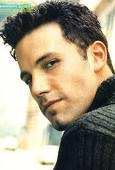

In [63]:
path = "/Users/wuyouxin/Documents/Python/Python_Junior/data/5_celeface/train/ben_afflek/httpcsvkmeuaeccjpg.jpg"
path2 = "/Users/wuyouxin/Documents/Python/Python_Junior/data/5_celeface/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg"
x_try = Image.open(path)
Image.open(path2)

x_try_array = np.array(Image.open(path))



In [68]:
x_train = np.array(convert_image_to_array(x_train))


AttributeError: 'builtin_function_or_method' object has no attribute 'read'

In [70]:
x_train

array([<built-in method tolist of numpy.ndarray object at 0x1a36a4bbc0>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bad0>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bd00>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bd50>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bda0>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bdf0>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4be40>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4be90>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bee0>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bf30>,
       <built-in method tolist of numpy.ndarray object at 0x1a36a4bf80>,
       <built-in method tolist of numpy.ndarray object at 0x1a368fd030>,
       <built-in method tolist of numpy.ndarray object at 0x1a368fd080>,
       <built-in method tolist of numpy.ndarray obj

In [39]:
np.array([[1, [2]], [2, [3]], [3, ]]).shape

(3,)

In [56]:
for i in x_train:
    print(i.shape)

(314, 236, 3)
(209, 292, 3)
(209, 165, 3)
(240, 320, 3)
(224, 300, 4)
(300, 300, 3)
(333, 236, 3)
(200, 200, 3)
(300, 300, 3)
(358, 250, 3)
(236, 355, 3)
(335, 220, 3)
(358, 241, 3)
(297, 220, 3)
(340, 220, 3)
(330, 236, 3)
(213, 160, 3)
(355, 236, 3)
(297, 292, 3)
(240, 360, 3)
(165, 220, 3)
(225, 305, 3)
(353, 236, 3)
(244, 236, 3)
(216, 216, 3)
(295, 295, 3)
(190, 190, 3)
(305, 236, 3)
(233, 350, 3)
(354, 236, 3)
(315, 236, 3)
(297, 236, 3)
(345, 236, 3)
(320, 240, 3)
(212, 238, 3)
(353, 236, 3)
(300, 300, 3)
(250, 250, 3)
(346, 220, 3)
(354, 236, 3)
(380, 236, 3)
(354, 236, 3)
(317, 214, 3)
(203, 360, 3)
(272, 245, 3)
(280, 230, 3)
(314, 236, 3)
(346, 236, 3)
(368, 245, 3)
(170, 115, 3)
(206, 160, 3)
(300, 300, 3)
(250, 250, 3)
(185, 150, 3)
(317, 214, 3)
(300, 236, 3)
(317, 214, 3)
(350, 243, 3)
(244, 161, 3)
(320, 236, 3)
(282, 236, 3)
(350, 243, 3)
(250, 164, 3)
(280, 300, 3)
(335, 236, 3)
(202, 300, 3)
(257, 294, 3)
(320, 240, 3)
(200, 255, 3)
(285, 220, 3)
(304, 230, 3)
(240, 

In [49]:
x_train[0].shape

(314, 236, 3)

In [61]:
x_train1 = x_train.reshape(93, 314, 236, 1)

ValueError: cannot reshape array of size 93 into shape (93,314,236,1)

In [61]:
model.fit(x_try_array, "epho", batch_size = 100, 
          epochs = 10, 
          validation_data = (x_test, y_test))

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (170, 115, 3)

In [ ]:
score = model.evaluate(x_test, y_test)

In [40]:
def predict(filename, featuresize):
    img = image.load_img(filename, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(preprocess_input(x))
    results = decode_predictions(preds, top=featuresize)[0]
    return results

In [44]:
def showimg(filename, title, i):
    im = Image.open(filename)
    im_list = np.asarray(im)
    plt.subplot(2,5,i)
    plt.title(title)
    plt.axis("off")
    plt.imshow(im_list)

In [47]:
filename = "/Users/wuyouxin/Downloads/IMG_4802.JPG"
plt.figure(figsize=(20, 10))
for i in range(1):
    showimg(filename, "query", i+1)
plt.show()
results = predict(filename, 10)
for result in results:
    print(result)

<Figure size 1440x720 with 0 Axes>

In [2]:
"/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test"

'/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test'

In [24]:
#path = /Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test
def resize_all(path, x_size, y_size):
    for i in os.listdir(path):
        if (i != ".DS_Store"):
            for j in os.listdir(os.path.join(path, i)):
                if (j != ".DS_store"):
                    newpath = os.path.join(path, i, j)
                    fig = cv2.imread(newpath)
                    # troble shoot gif problem
                    try:
                        refig = cv2.resize(fig, (x_size, y_size))
                        cv2.imwrite(newpath, refig)
                    except:
                        os.remove(newpath)
                        


In [ ]:
            
for i in os.listdir(path):
    if (i != ".DS_Store"):
        for j in os.listdir(path+i):
            if (j != ".DS_Store"):
                newpath = path+i+"/"+j
                fig = cv2.imread(newpath)
                #print(newpath)
                try:
                    refig = cv2.resize(fig, (100, 100))
                    cv2.imwrite(newpath,refig)
                except:
                    os.remove(newpath)

In [26]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [27]:
x_train, y_train, train_label = load_dataset("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/train")
x_test, y_test, test_label = load_dataset("/Users/wuyouxin/Documents/Python/Python_Junior/data/celebritys/test")

In [28]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [29]:
def pridect(path):
    fig = cv2.imread(path)
    print(fig.shape)
    refig = np.array([cv2.resize(fig, (100,100))])
    print(refig.shape)
    results = model1.predict(refig, 5)[0]
    for i in np.arange(len(results)):
        print(test_label[i])
        print(results[i])